In [1]:
# Marvel Hans - 0706022210039 - Group 2

!pip install pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load your data
url = "Dataset-IDX-Composite.csv"
df = pd.read_csv(url)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sort the DataFrame by the 'Year' column in ascending order
df_sort = df.sort_values(by='Year')

# Display the sorted DataFrame
df_sort

,Date,Open,High,Low,Close,Adj Close,Volume,Year
99,2023-11-24,"7,004.48","7,049.54","7,000.10","7,009.63","7,009.63","181,146,200",2023
76,2023-12-29,"7,307.11","7,309.78","7,259.68","7,272.80","7,272.80","123,172,800",2023
77,2023-12-28,"7,266.57","7,308.21","7,262.25","7,303.89","7,303.89","123,036,000",2023
78,2023-12-27,"7,256.16","7,293.52","7,239.66","7,245.92","7,245.92","124,953,000",2023
79,2023-12-22,"7,225.62","7,248.55","7,218.17","7,237.52","7,237.52","111,284,900",2023
...,...,...,...,...,...,...,...,...
28,2024-03-14,"7,405.57","7,454.45","7,380.65","7,433.31","7,433.31","129,206,200",2024
27,2024-03-15,"7,408.66","7,416.34","7,308.04","7,328.05","7,328.05","231,480,500",2024
26,2024-03-18,"7,338.08","7,358.55","7,300.94","7,302.45","7,302.45","155,334,600",2024
24,2024-03-20,"7,303.93","7,343.46","7,295.35","7,331.13","7,331.13","169,731,600",2024


In [3]:
# cek mising value
missing_value = df_sort.isna().sum()
print(missing_value)

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Year          0
dtype: int64


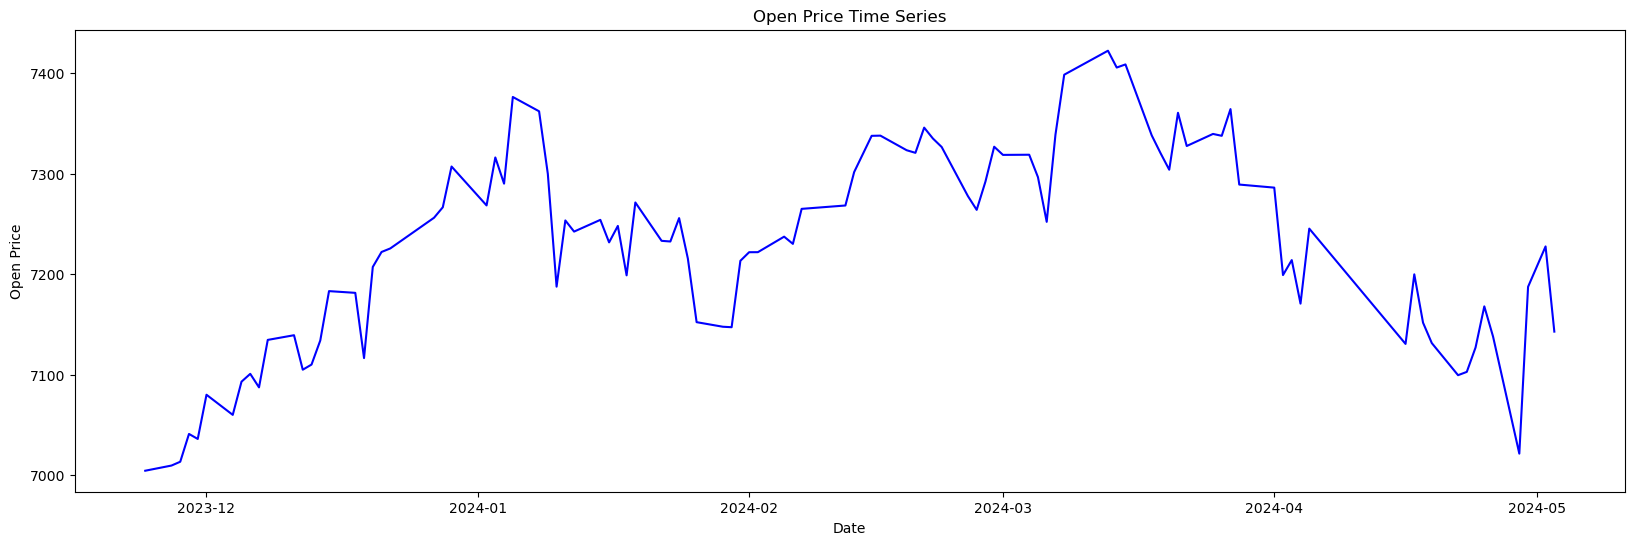

In [4]:
x_date = df['Date']
y_open = df['Open']

# Konversi 'Open' ke dalam tipe data numerik
y_open = y_open.str.replace(',', '').astype(float)

# Visualize the data
x = np.arange(y_open.shape[0])
plt.figure(figsize=(20, 6))
plt.plot(x_date, y_open, c='blue')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Time Series')
plt.show()

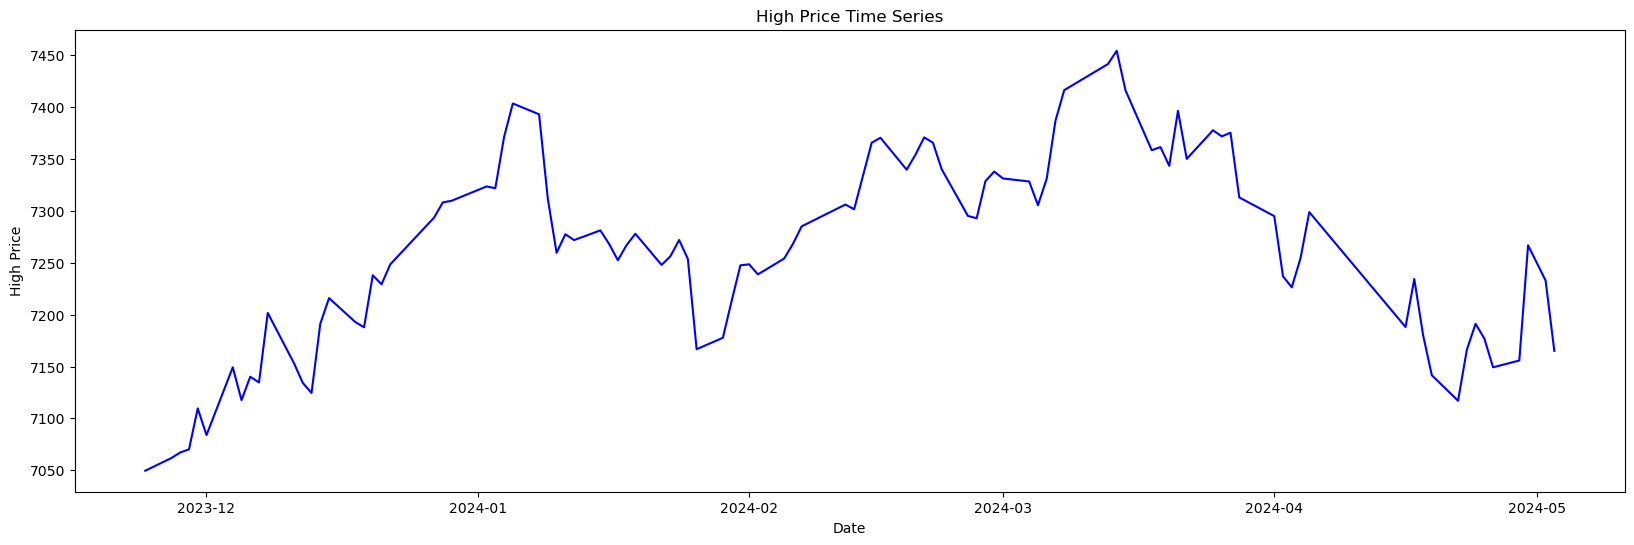

In [26]:
x_date = df['Date']
y_high = df['High']

# Konversi nilai-nilai dalam kolom 'High' ke dalam tipe data numerik
y_high = y_high.str.replace(',', '').astype(float)

# Visualize the data
x = np.arange(y_high.shape[0])
plt.figure(figsize=(20, 6))
plt.plot(x_date, y_high, c='blue')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Time Series')
plt.show()

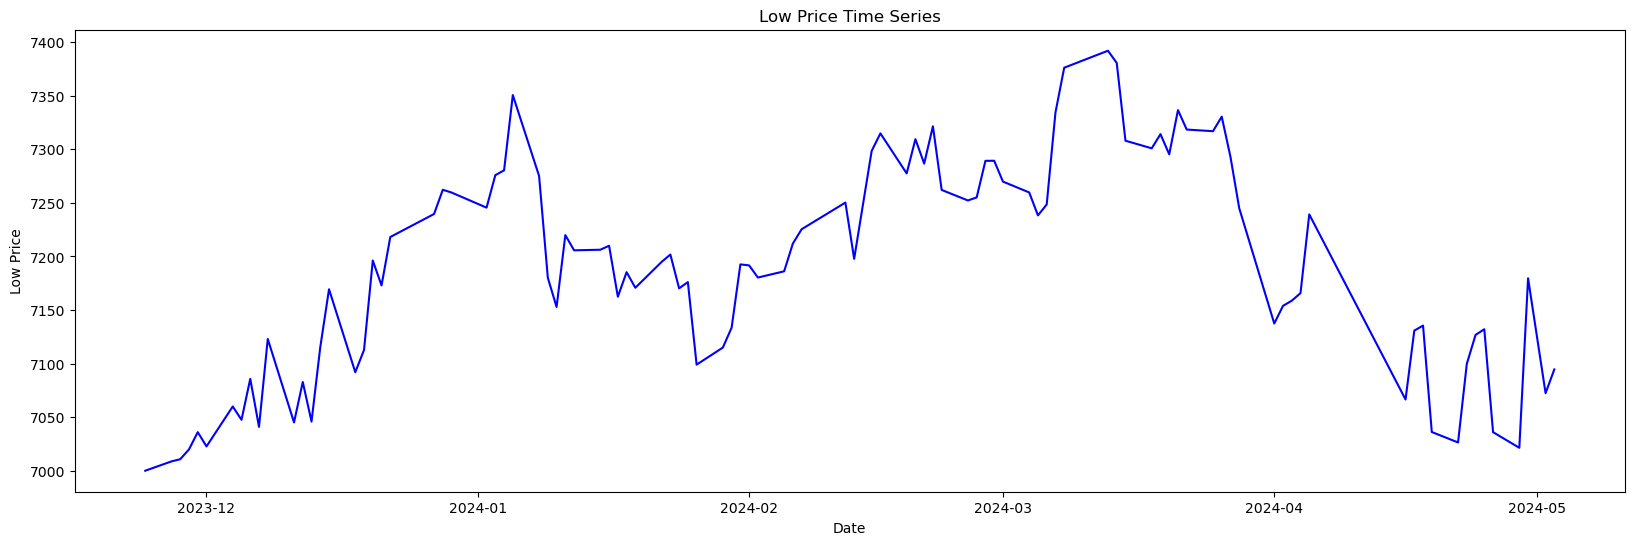

In [6]:
x_date = df['Date']
y_low = df['Low']

# Konversi nilai-nilai dalam kolom 'Low' ke dalam tipe data numerik
y_low = y_low.str.replace(',', '').astype(float)

# Visualize the data
x = np.arange(y_low.shape[0])
plt.figure(figsize=(20, 6))
plt.plot(x_date, y_low, c='blue')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price Time Series')
plt.show()

In [7]:
y = df['Open'] # saya pilih y nya open 

# Konversi 'Open' ke dalam tipe data numerik
y = y.str.replace(',', '').astype(float)

print(y)

0     7142.86
1     7227.61
2     7187.41
3     7021.49
4     7137.93
       ...   
95    7036.09
96    7041.07
97    7013.41
98    7009.63
99    7004.48
Name: Open, Length: 100, dtype: float64


In [8]:
# Split your data
train, test = train_test_split(y, train_size=80)

# train_size= 80 menentukan bahwa 80% dari data akan dialokasikan ke set pelatihan (train)
# sedangkan 20% sisanya akan dialokasikan ke set pengujian (test) 

In [9]:
train

0     7142.86
1     7227.61
2     7187.41
3     7021.49
4     7137.93
       ...   
75    7268.40
76    7307.11
77    7266.57
78    7256.16
79    7225.62
Name: Open, Length: 80, dtype: float64

In [10]:
test

80    7222.09
81    7207.18
82    7116.55
83    7181.43
84    7183.15
85    7134.04
86    7110.08
87    7104.97
88    7139.28
89    7134.62
90    7087.40
91    7100.85
92    7093.06
93    7060.04
94    7080.06
95    7036.09
96    7041.07
97    7013.41
98    7009.63
99    7004.48
Name: Open, dtype: float64

In [11]:
# Fit your model SARIMA
model_SARIMA = pm.auto_arima(train, seasonal=True, m=12, error_action='ignore')

# seasonal = True menunjukkan bahwa model SARIMA yang akan dibuat bersifat musiman.
# m = 12 menentukan panjang musiman dalam data, misalnya, jika data memiliki musim tahunan, m akan disetel ke 12.

In [12]:
model_SARIMA

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [13]:
# make your forecasts_SARIMA  
forecasts_SARIMA = model_SARIMA.predict(test.shape[0])  # predict steps into the future

In [14]:
forecasts_SARIMA

80    7237.361159
81    7223.640364
82    7247.568289
83    7260.723994
84    7266.167421
85    7248.426604
86    7253.218516
87    7247.321836
88    7254.116911
89    7246.718994
90    7243.883509
91    7237.607738
92    7240.162196
93    7240.870566
94    7241.783576
95    7242.529201
96    7243.193940
97    7243.775166
98    7244.285504
99    7244.733193
dtype: float64

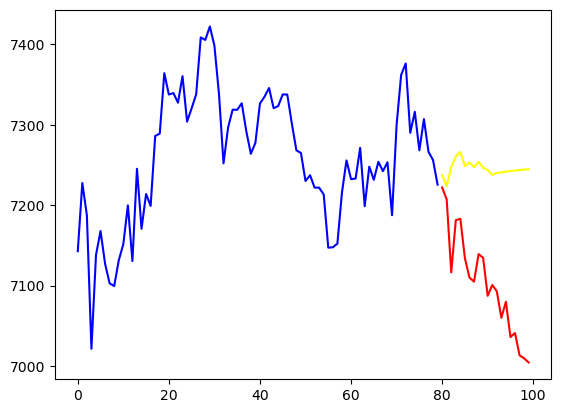

In [31]:
# Visualize the forecasts_SARIMA (blue= train, red= test, yellow= forecasts_SARIMA)
x = np.arange(y.shape[0])
plt.plot(x[:80], train, c='blue')
plt.plot(x[80:], test, c='red')
plt.plot(x[80:], forecasts_SARIMA, c='yellow')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

# Calculate the SARIMA mean squared error
mse_SARIMA = mean_squared_error(test, forecasts_SARIMA)

# MSE mengukur rata-rata dari kuadrat perbedaan antara nilai sebenarnya dengan nilai yang diprediksi oleh model.
# Semakin kecil MSE, semakin baik modelnya.

# Print the SARIMA mean squared error
print("SARIMA Mean Squared Error: {:0.4f}".format(mse_SARIMA))

SARIMA Mean Squared Error: 24172.3612


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the SARIMA mean absolute percentage error
mape_SARIMA = mean_absolute_percentage_error(test, forecasts_SARIMA)

# MAPE mengukur seberapa dekat prediksi dengan nilai aktual dalam bentuk persentase.
# Semakin kecil nilai MAPE, semakin baik performa modelnya.

# Print the SARIMA mean squared error
print("SARIMA Mean Absolute Percentage Error : {:0.4f}".format(mape_SARIMA))

SARIMA Mean Absolute Percentage Error : 0.0201


In [18]:
# Fit your model ARIMA
model_ARIMA = pm.auto_arima(train, seasonal=False, error_action='ignore')

# seasonal = False menunjukkan bahwa model ARIMA yang akan dibuat tidak bersifat musiman.

In [19]:
model_ARIMA

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [20]:
# make your forecasts
forecasts_ARIMA = model_ARIMA.predict(test.shape[0])  # predict N steps into the future

In [21]:
forecasts_ARIMA

80    7235.059316
81    7235.384719
82    7237.426358
83    7238.838004
84    7240.165609
85    7241.315783
86    7242.332486
87    7243.226683
88    7244.014126
89    7244.707342
90    7245.317654
91    7245.854967
92    7246.328014
93    7246.744481
94    7247.111135
95    7247.433936
96    7247.718127
97    7247.968327
98    7248.188601
99    7248.382529
dtype: float64

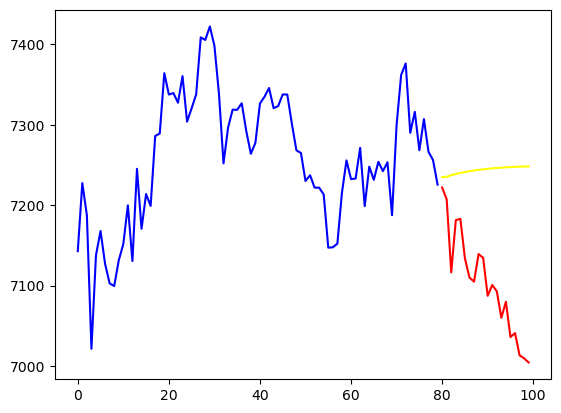

In [22]:
# Visualize the forecasts_ARIMA (blue= train, red= test, yellow= forecasts_ARIMA)
x = np.arange(y.shape[0])
plt.plot(x[:80], train, c='blue')
plt.plot(x[80:], test, c='red')
plt.plot(x[80:], forecasts_ARIMA, c='yellow')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

# Calculate the ARIMA mean squared error
mse_ARIMA = mean_squared_error(test, forecasts_ARIMA)

# MSE mengukur rata-rata dari kuadrat perbedaan antara nilai sebenarnya dengan nilai yang diprediksi oleh model.
# Semakin kecil MSE, semakin baik modelnya.

# Print the ARIMA mean squared error
print("ARIMA Mean Squared Error: {:0.4f}".format(mse_ARIMA))

ARIMA Mean Squared Error: 24216.4783


In [24]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the ARIMA mean absolute percentage error
mape_ARIMA = mean_absolute_percentage_error(test, forecasts_ARIMA)

# MAPE mengukur seberapa dekat prediksi dengan nilai aktual dalam bentuk persentase.
# Semakin kecil nilai MAPE, semakin baik performa modelnya.

# Print the ARIMA mean squared error
print("ARIMA Mean Absolute Percentage Error : {:0.4f}".format(mape_ARIMA))

ARIMA Mean Absolute Percentage Error : 0.0199


In [ ]:
# Kesimpulan
# Bisa dilihat hasil SARIMA Mean Squared Error: 24172.3612 lebih kecil atau rendah dari ARIMA Mean Squared Error: 24216.4783
# Bisa dilihat hasil SARIMA Mean Absolute Percentage Error : 0.0201 lebih besar atau tinggi dari 
# ARIMA Mean Absolute Percentage Error : 0.0199